# Ejemplo Personal. m-ésima diferencia.

In [1]:
# Importar las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import pds

fact = np.math.factorial

Debido a que los ciclos for son el diablo en Python por ser extremadamente lentos usaremos numpy para resolver la m-ésima diferencia.

$\Delta^m f(n) = \sum_{i = 0}^{m}(-1)^iC_m^i f(n - i)$

Donde $C_m^i$ son los coeficientes del triángulo de Pascal, definidos así:

$C_m^i = \frac{m!}{i!(m - i)!}$

In [26]:
def difference(n, X, m = 1):
    C = lambda i, m: fact(m)/(fact(i) * fact(m - i))
    X_diff = np.zeros(len(X) - m)
    for n_i in range(m, len(X)):
        X_diff[n_i - m] = sum(np.power(-1, i) * C(i, m) * X[n_i - i] for i in range(m + 1))
    return n[m:], X_diff

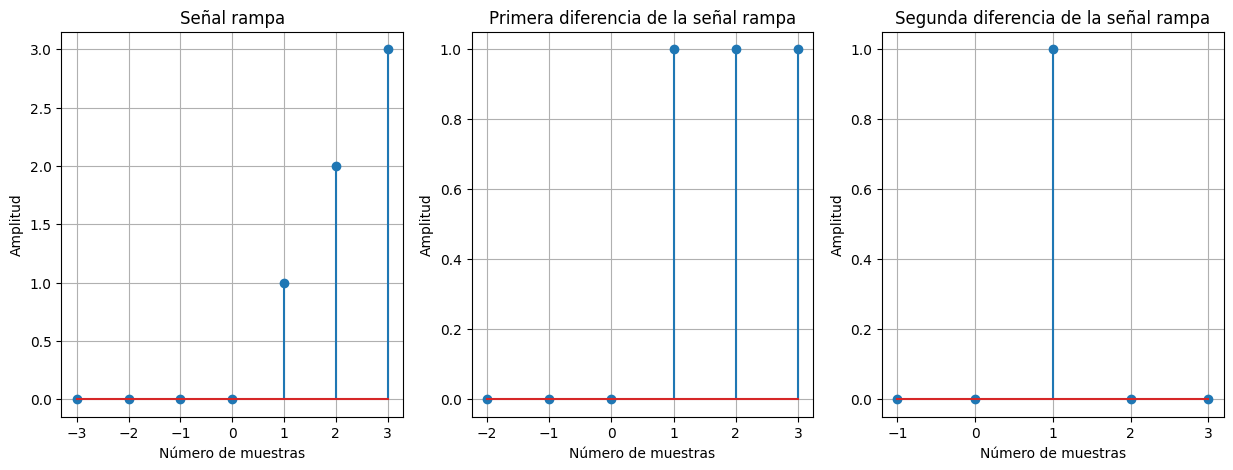

In [27]:
# Función rampa
n, X = pds.ramp()

# Gráfica de las señales
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.title("Señal rampa")
plt.stem(n, X)
plt.grid()
plt.xlabel("Número de muestras")
plt.ylabel("Amplitud")

plt.subplot(1, 3, 2)
plt.title("Primera diferencia de la señal rampa")
plt.stem(*difference(n, X, m = 1))
plt.grid()
plt.xlabel('Número de muestras')
plt.ylabel('Amplitud')

plt.subplot(1, 3, 3)
plt.title("Segunda diferencia de la señal rampa")
plt.stem(*difference(n, X, m = 2))
plt.grid()
plt.xlabel('Número de muestras')
plt.ylabel('Amplitud')

plt.show()

El resultado concuerda con la teoría, ya que la diferencia es el equivalente discreto de la derivada, y en el mundo continuo la derivada de la función rampa es la función escalón unitario, y la derivada de esta es la delta de Dirac, en el mundo discreto sería la delta de Kronecker.